Analysis of a population data

In [2]:
#Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt #or from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
df_popul=pd.read_csv(r'C:\Users\val-c\Desktop\COURSERA DATASHEET\population.csv') #import homelessness csvfile


#display first-twenty rows
df_popul.head(20)

,region,state,individuals,family_members,state_pop
0,East South Central,Alabama,2570.0,864.0,4887681
1,Pacific,Alaska,1434.0,582.0,735139
2,Mountain,Arizona,7259.0,2606.0,7158024
3,West South Central,Arkansas,2280.0,432.0,3009733
4,Pacific,California,109008.0,20964.0,39461588
5,Mountain,Colorado,7607.0,3250.0,5691287
6,New England,Connecticut,2280.0,1696.0,3571520
7,South Atlantic,Delaware,708.0,374.0,965479
8,South Atlantic,District of Columbia,3770.0,3134.0,701547
9,South Atlantic,Florida,21443.0,9587.0,21244317


In [5]:
#Rename columns [family_members,state_pop] to remove (_)

df_popul.rename(columns = {'family_members':'family members','state_pop':'state population'},
                 inplace = True)
#print corrected columns with the rest
df_popul.columns

Index(['region', 'state', 'individuals', 'family members', 'state population'], dtype='object')

In [8]:
#Check for missing values

print(df_popul.isna().tail(10).sum())

region              0
state               0
individuals         0
family members      0
state population    0
dtype: int64


In [10]:
#Display info and datatypes of our dataframe

df_popul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   region            51 non-null     object 
 1   state             51 non-null     object 
 2   individuals       51 non-null     float64
 3   family members    51 non-null     float64
 4   state population  51 non-null     int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 2.1+ KB


In [16]:
#get the statistics of the dataframe

df_popul.describe(include='all')

,region,state,individuals,family members,state population
count,51,51,51.000000,51.000000,5.100000e+01
unique,9,51,NaN,NaN,NaN
top,South Atlantic,Alabama,NaN,NaN,NaN
freq,9,1,NaN,NaN,NaN
mean,NaN,NaN,7225.784314,3504.882353,6.405637e+06
std,NaN,NaN,15991.025083,7805.411811,7.327258e+06
min,NaN,NaN,434.000000,75.000000,5.776010e+05
25%,NaN,NaN,1446.500000,592.000000,1.777414e+06
50%,NaN,NaN,3082.000000,1482.000000,4.461153e+06
75%,NaN,NaN,6781.500000,3196.000000,7.340946e+06


In [11]:
#Calculate the total state population of each region, grouped by region and display the figure by a barplot

grp_by=df_popul.groupby('region')['state population'].sum().to_frame('total population')
grp_by

,total population
region,
East North Central,46886387
East South Central,19101485
Mid-Atlantic,41217298
Mountain,24511745
New England,14829322
Pacific,53323075
South Atlantic,65229624
West North Central,21350241
West South Central,40238324


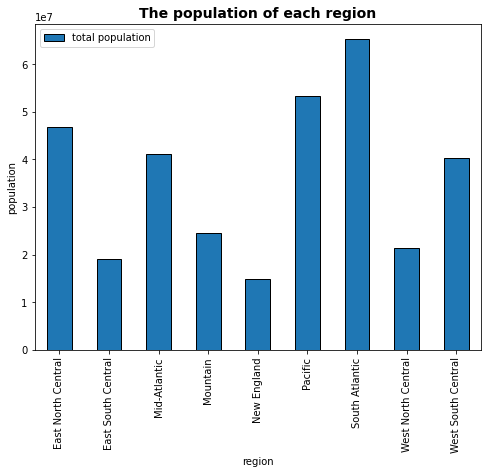

In [12]:
grp_by.plot.bar(figsize=(8,6),edgecolor='black')
plt.title('The population of each region', fontweight='bold',fontsize=14)
#y-axis label
plt.ylabel('population')
#display figure
plt.show()

In [13]:
#Calculation the total number of states that made up the different regions?

tot_state=df_popul['state'].value_counts().sum()
print('total number of states =',tot_state)

total number of states = 51


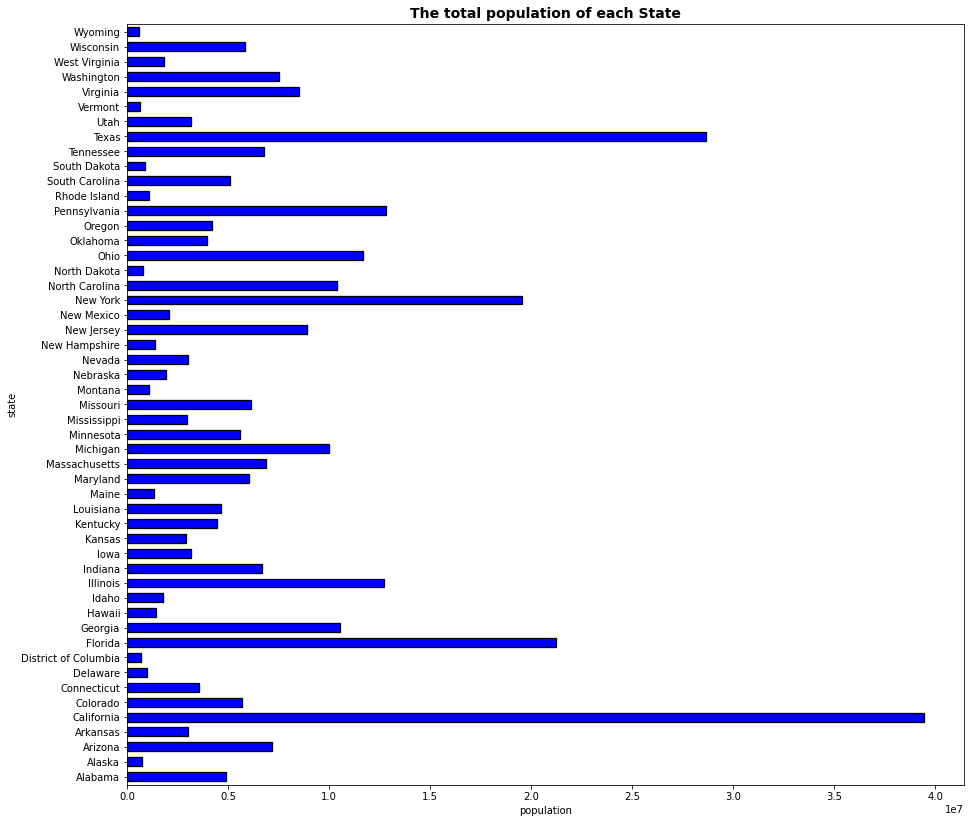

In [14]:
#Get the total of the states population grouped by state and plot the horizonatal barchart

sta_pol=df_popul.groupby('state')['state population'].sum()
#employ bar plot func to plot datasets
sta_pol.plot.barh(figsize=(15,14),width=0.6,color='blue',fontsize=10,lw=1.3,edgecolor='black',)
#title of the bar chart
plt.title('The total population of each State', fontweight='bold',fontsize=14)
#x-axis label
plt.xlabel('population')
#display figure
plt.show()

In [17]:
#save cleaned dataset
df_popul.to_csv('population_cleaned_data.csv')